## GPI Forecast Calculation

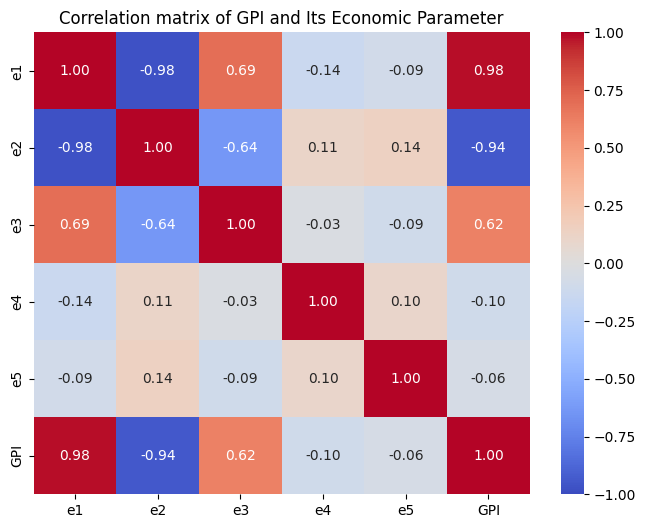

In [7]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_GPI = pd.read_csv('GPI.csv', sep=';')

# Calculate correlation matrix
cols_of_interest = ['e1', 'e2', 'e3', 'e4', 'e5', 'GPI']  # column names here
corr_subset = df_GPI[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix of GPI and Its Economic Parameter')
plt.show()


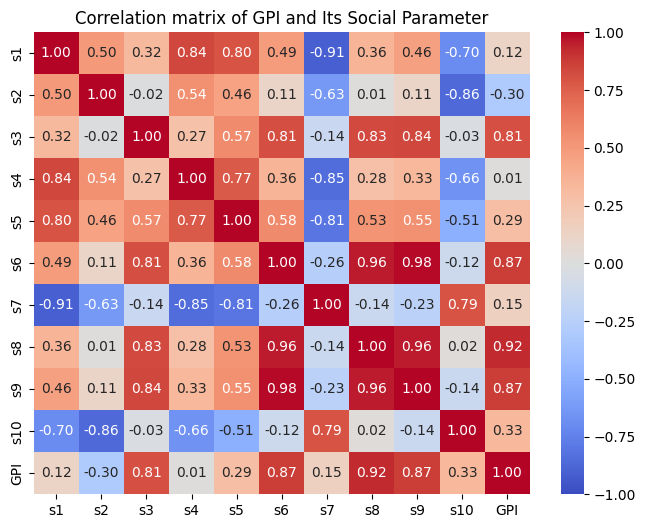

In [8]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_GPI = pd.read_csv('GPI.csv', sep=';')

# Calculate correlation matrix
cols_of_interest = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 'GPI']  # column names here
corr_subset = df_GPI[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix of GPI and Its Social Parameter')
plt.show()

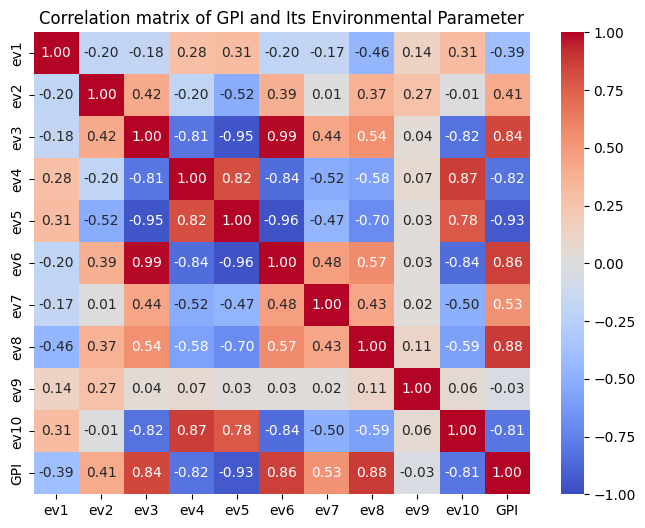

In [9]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_GPI = pd.read_csv('GPI.csv', sep=';')

# Calculate correlation matrix
cols_of_interest = ['ev1', 'ev2', 'ev3', 'ev4', 'ev5', 'ev6', 'ev7', 'ev8', 'ev9', 'ev10', 'GPI']  # column names here
corr_subset = df_GPI[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix of GPI and Its Environmental Parameter')
plt.show()

## MLR Function of GPI vs Year

Mean Squared Error: 9876889.463169064
Root Mean Squared Error: 3142.751893352236
R-squared: 0.8381954013538101
Equation: GPI = -1699902.0715 + 855.5520 * Year


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


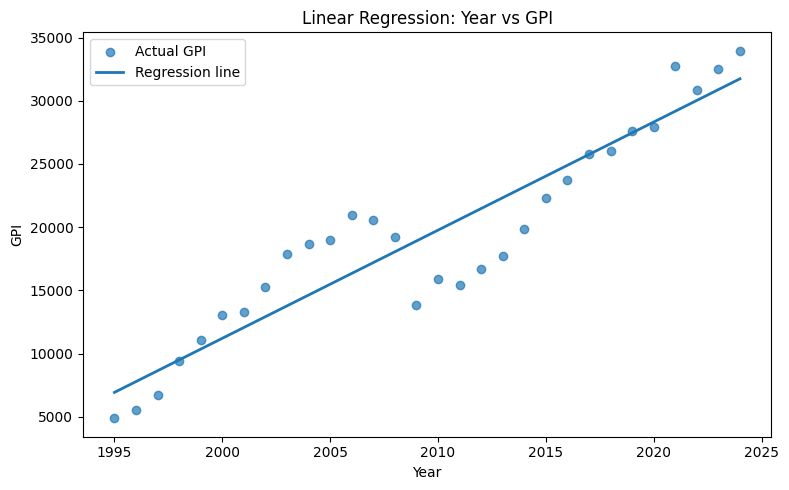

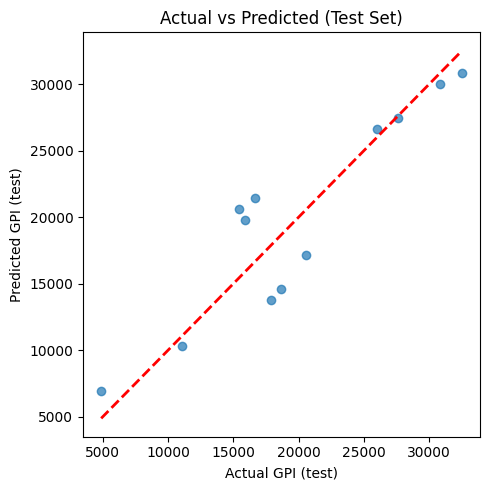

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Predictor X and target y
X = df_GPI[['Year']]
y = df_GPI['GPI']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse_without_PCA = mean_squared_error(y_test, y_pred)
rmse_without_PCA = np.sqrt(mse_without_PCA)
r2_without_PCA = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_without_PCA}')
print(f'Root Mean Squared Error: {rmse_without_PCA}')
print(f'R-squared: {r2_without_PCA}')

# Display the equation of the MLR model
coefficients_without_PCA = model.coef_
intercept_without_PCA = model.intercept_
equation_without_PCA = 'GPI = {:.4f} + '.format(intercept_without_PCA) + ' + '.join(['{:.4f} * {}'.format(coef, col) for coef, col in zip(coefficients_without_PCA, X.columns)])
print('Equation:', equation_without_PCA)

# ================== PLOTS ==================
import matplotlib.pyplot as plt
# 1) Scatter of all data + regression line
plt.figure(figsize=(8, 5))

# Scatter: all historical data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI', alpha=0.7)

# Regression line: use a smooth range of years
year_grid = np.linspace(df_GPI['Year'].min(), df_GPI['Year'].max(), 200).reshape(-1, 1)
gpi_line = model.predict(year_grid)

plt.plot(year_grid, gpi_line, label='Regression line', linewidth=2)

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Linear Regression: Year vs GPI')
plt.legend()
plt.tight_layout()
plt.show()

# 2) (Optional) Actual vs Predicted on test set
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
# 45-degree reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel('Actual GPI (test)')
plt.ylabel('Predicted GPI (test)')
plt.title('Actual vs Predicted (Test Set)')
plt.tight_layout()
plt.show()


Mean Squared Error: 9876889.463169064
Root Mean Squared Error: 3142.751893352236
R-squared: 0.8381954013538101
Equation: GPI = -1699902.0715 + 855.5520 * Year

Predicted GPI from 2025 to 2050:
 Year  Predicted_GPI
 2025   32590.808917
 2026   33446.360957
 2027   34301.912997
 2028   35157.465037
 2029   36013.017076
 2030   36868.569116
 2031   37724.121156
 2032   38579.673195
 2033   39435.225235
 2034   40290.777275
 2035   41146.329315
 2036   42001.881354
 2037   42857.433394
 2038   43712.985434
 2039   44568.537473
 2040   45424.089513
 2041   46279.641553
 2042   47135.193593
 2043   47990.745632
 2044   48846.297672
 2045   49701.849712
 2046   50557.401752
 2047   51412.953791
 2048   52268.505831
 2049   53124.057871
 2050   53979.609910


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


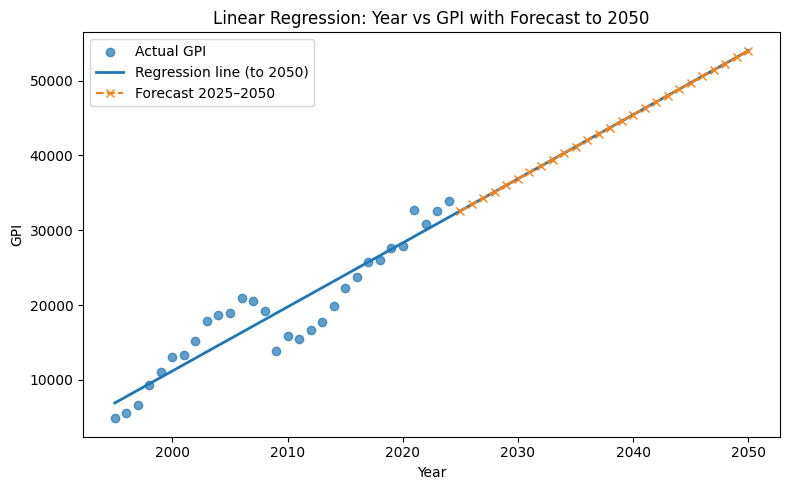

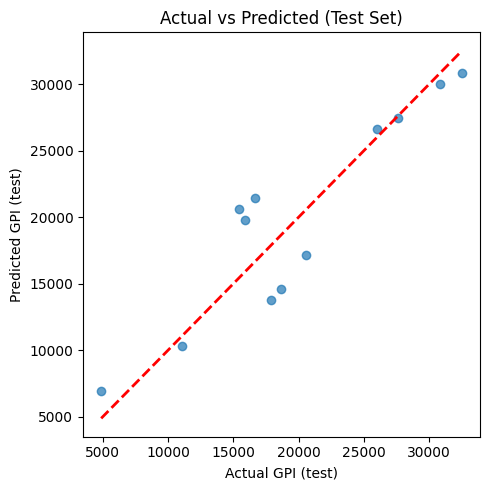

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_GPI is already loaded, e.g.:
# df_GPI = pd.read_csv("GPI.csv", sep=";")
# df_GPI.columns = df_GPI.columns.str.strip()

# Predictor X and target y
X = df_GPI[['Year']]
y = df_GPI['GPI']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse_without_PCA = mean_squared_error(y_test, y_pred)
rmse_without_PCA = np.sqrt(mse_without_PCA)
r2_without_PCA = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_without_PCA}')
print(f'Root Mean Squared Error: {rmse_without_PCA}')
print(f'R-squared: {r2_without_PCA}')

# Display the equation of the model
coefficients_without_PCA = model.coef_
intercept_without_PCA = model.intercept_
equation_without_PCA = 'GPI = {:.4f} + '.format(intercept_without_PCA) + ' + '.join(
    ['{:.4f} * {}'.format(coef, col) for coef, col in zip(coefficients_without_PCA, X.columns)]
)
print('Equation:', equation_without_PCA)

# ---------- PREDICTION 2025–2050 ----------
future_years = np.arange(2025, 2051).reshape(-1, 1)  # 2025..2050
future_gpi_pred = model.predict(future_years)

df_future = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_GPI': future_gpi_pred
})
print("\nPredicted GPI from 2025 to 2050:")
print(df_future.to_string(index=False))

# ---------- PLOTS ----------

# 1) Scatter of all data + regression line extended to 2050
plt.figure(figsize=(8, 5))

# Scatter: all historical data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI', alpha=0.7)

# Regression line from min year in data up to 2050
year_grid = np.linspace(df_GPI['Year'].min(), 2050, 300).reshape(-1, 1)
gpi_line = model.predict(year_grid)
plt.plot(year_grid, gpi_line, label='Regression line (to 2050)', linewidth=2)

# Highlight forecast points 2025–2050
plt.plot(df_future['Year'], df_future['Predicted_GPI'],
         'x--', label='Forecast 2025–2050')

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Linear Regression: Year vs GPI with Forecast to 2050')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Optional: Actual vs Predicted on test set
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel('Actual GPI (test)')
plt.ylabel('Predicted GPI (test)')
plt.title('Actual vs Predicted (Test Set)')
plt.tight_layout()
plt.show()


## Non-Linear Algorithm

Polynomial degree: 2, Ridge alpha: 0.0001
R² score: 0.6059147873215953
MAE: 2959.538509708149
 Year  Predicted_GPI
 2025   33465.536265
 2026   34525.564470
 2027   35599.156424
 2028   36686.312126
 2029   37787.031577
 2030   38901.314776
 2031   40029.161724
 2032   41170.572420
 2033   42325.546864
 2034   43494.085058
 2035   44676.186999
 2036   45871.852689
 2037   47081.082128
 2038   48303.875315
 2039   49540.232251
 2040   50790.152935
 2041   52053.637367
 2042   53330.685548
 2043   54621.297478
 2044   55925.473155
 2045   57243.212582
 2046   58574.515757
 2047   59919.382680
 2048   61277.813352
 2049   62649.807772
 2050   64035.365941


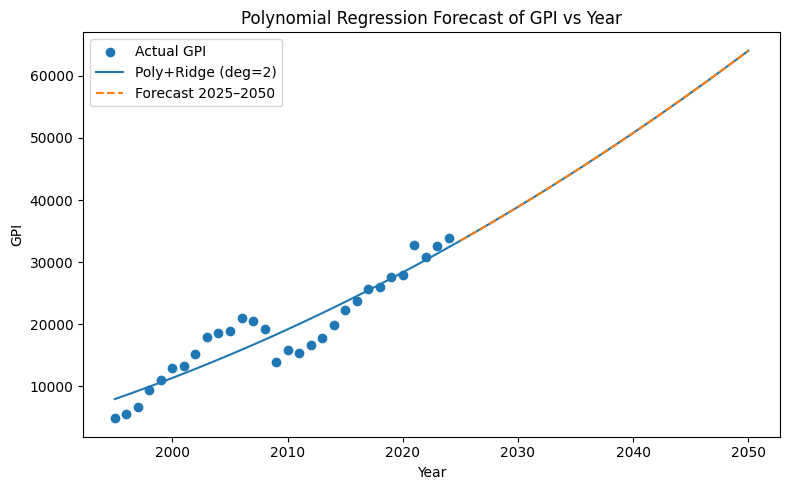

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df_GPI = pd.read_csv('GPI.csv', sep=';')
df_GPI.columns = df_GPI.columns.str.strip()

# 2. Feature (Year) and target (GPI)
years = df_GPI['Year'].values.reshape(-1, 1)
y = df_GPI['GPI'].values

# ---- IMPORTANT: center the year to avoid huge powers ----
year_mean = years.mean()
X = years - year_mean   # now values are like -15, -10, ... , +10 instead of 1990, 2000, ...

# 3. Build a *non-linear* regression model (polynomial + Ridge)
degree = 2  # try 2 first; 3 if you really need more curvature
alpha = 0.0001  # regularization strength

model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    Ridge(alpha=alpha)
)

# 4. Train/test split to evaluate
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(f"Polynomial degree: {degree}, Ridge alpha: {alpha}")
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# 6. Refit on ALL data for forecasting
model.fit(X, y)

# 7. Forecast GPI for years 2025–2050
future_years = np.arange(2025, 2051).reshape(-1, 1)
future_X = future_years - year_mean    # <-- center in the SAME way

future_gpi_pred = model.predict(future_X)

df_future = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_GPI': future_gpi_pred
})

print(df_future.to_string(index=False))

# 8. Plot historical data + fitted curve + forecast
plt.figure(figsize=(8, 5))

# scatter of actual data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI')

# smooth fitted curve from min year to 2050
year_grid = np.linspace(df_GPI['Year'].min(), 2050, 300).reshape(-1, 1)
X_grid = year_grid - year_mean
gpi_grid_pred = model.predict(X_grid)

plt.plot(year_grid.ravel(), gpi_grid_pred, label=f'Poly+Ridge (deg={degree})')

# highlight future forecast segment
plt.plot(df_future['Year'], df_future['Predicted_GPI'],
         linestyle='--', label='Forecast 2025–2050')

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Polynomial Regression Forecast of GPI vs Year')
plt.legend()
plt.tight_layout()
plt.show()


## SVR 

SVR (RBF) performance:
  R² score: 0.969884791041227
  MAE: 746.5448017488616
 Year  Predicted_GPI
 2025   34657.591671
 2026   35378.249373
 2027   35725.748350
 2028   35628.367171
 2029   35065.137889
 2030   34070.270335
 2031   32725.691038
 2032   31145.033828
 2033   29453.886804
 2034   27771.039357
 2035   26194.248422
 2036   24792.258279
 2037   23603.064783
 2038   22637.139377
 2039   21883.700366
 2040   21318.095082
 2041   20908.752196
 2042   20622.748999
 2043   20429.616293
 2044   20303.448399
 2045   20223.650708
 2046   20174.755353
 2047   20145.713439
 2048   20128.984336
 2049   20119.634792
 2050   20114.563311


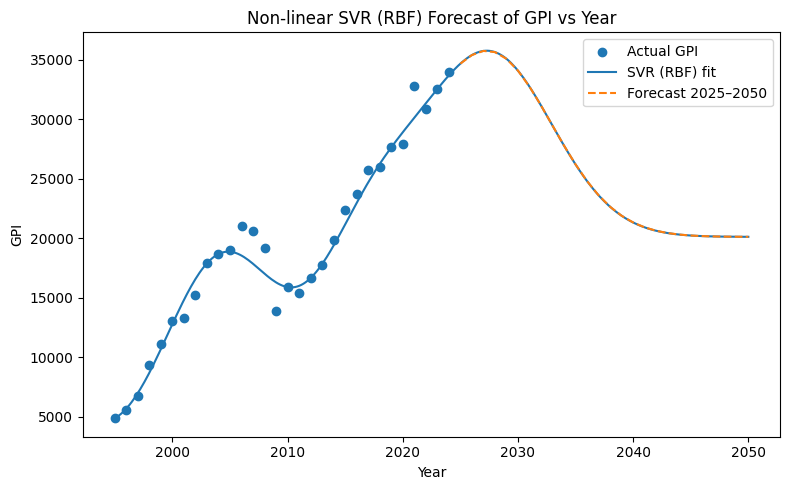

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df_GPI = pd.read_csv('GPI.csv', sep=';')
df_GPI.columns = df_GPI.columns.str.strip()

# 2. Feature (Year) and target (GPI)
X = df_GPI[['Year']].values   # shape (n_samples, 1)
y = df_GPI['GPI'].values      # shape (n_samples,)

# 3. Build non-linear SVR (RBF kernel) inside a pipeline with scaling
svr_rbf = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=50000.0, gamma='scale', epsilon=0.1)
)

# 4. Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svr_rbf.fit(X_train, y_train)

# 5. Evaluate
y_pred = svr_rbf.predict(X_test)
print("SVR (RBF) performance:")
print("  R² score:", r2_score(y_test, y_pred))
print("  MAE:", mean_absolute_error(y_test, y_pred))

# 6. Refit on ALL data for final model
svr_rbf.fit(X, y)

# 7. Forecast GPI for years 2025–2050
future_years = np.arange(2025, 2051).reshape(-1, 1)   # 2025..2050 (inclusive)
future_gpi_pred = svr_rbf.predict(future_years)

df_future = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_GPI': future_gpi_pred
})

print(df_future.to_string(index=False))

# 8. Plot historical data + SVR fit + future forecast
plt.figure(figsize=(8, 5))

# Scatter of actual data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI')

# Smooth SVR fit over full range from min year to 2050
year_grid = np.linspace(df_GPI['Year'].min(), 2050, 300).reshape(-1, 1)
gpi_grid_pred = svr_rbf.predict(year_grid)

plt.plot(year_grid.ravel(), gpi_grid_pred, label='SVR (RBF) fit')

# Future forecast segment (2025–2050)
plt.plot(df_future['Year'], df_future['Predicted_GPI'],
         linestyle='--', label='Forecast 2025–2050')

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Non-linear SVR (RBF) Forecast of GPI vs Year')
plt.legend()
plt.tight_layout()
plt.show()


SVR (RBF) performance:
  Train R² : 0.9741050453395378
  Train MAE: 947.9536343588253
  Test  R² : 0.969884791041227
  Test  MAE: 746.5448017488616
 Year  Predicted_GPI
 2025   34657.591671
 2026   35378.249373
 2027   35725.748350
 2028   35628.367171
 2029   35065.137889
 2030   34070.270335
 2031   32725.691038
 2032   31145.033828
 2033   29453.886804
 2034   27771.039357
 2035   26194.248422
 2036   24792.258279
 2037   23603.064783
 2038   22637.139377
 2039   21883.700366
 2040   21318.095082
 2041   20908.752196
 2042   20622.748999
 2043   20429.616293
 2044   20303.448399
 2045   20223.650708
 2046   20174.755353
 2047   20145.713439
 2048   20128.984336
 2049   20119.634792
 2050   20114.563311


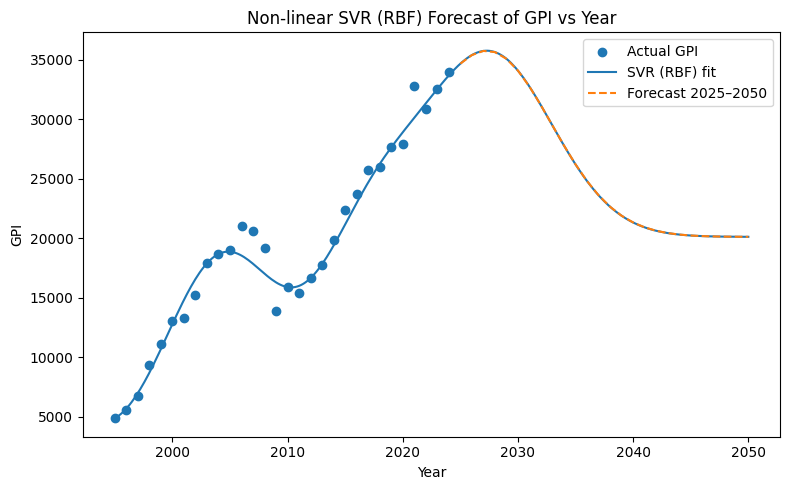

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df_GPI = pd.read_csv('GPI.csv', sep=';')
df_GPI.columns = df_GPI.columns.str.strip()

# 2. Feature (Year) and target (GPI)
X = df_GPI[['Year']].values   # shape (n_samples, 1)
y = df_GPI['GPI'].values      # shape (n_samples,)

# 3. Build non-linear SVR (RBF kernel) inside a pipeline with scaling
svr_rbf = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=50000.0, gamma='scale', epsilon=0.1)
)

# 4. Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svr_rbf.fit(X_train, y_train)

# ---- 5. Evaluate: TRAIN + TEST ----
y_train_pred = svr_rbf.predict(X_train)
y_test_pred  = svr_rbf.predict(X_test)

print("SVR (RBF) performance:")
print("  Train R² :", r2_score(y_train, y_train_pred))
print("  Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("  Test  R² :", r2_score(y_test, y_test_pred))
print("  Test  MAE:", mean_absolute_error(y_test, y_test_pred))

# 6. Refit on ALL data for final model
svr_rbf.fit(X, y)

# 7. Forecast GPI for years 2025–2050
future_years = np.arange(2025, 2051).reshape(-1, 1)   # 2025..2050 (inclusive)
future_gpi_pred = svr_rbf.predict(future_years)

df_future = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_GPI': future_gpi_pred
})

print(df_future.to_string(index=False))

# 8. Plot historical data + SVR fit + future forecast
plt.figure(figsize=(8, 5))

# Scatter of actual data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI')

# Smooth SVR fit over full range from min year to 2050
year_grid = np.linspace(df_GPI['Year'].min(), 2050, 300).reshape(-1, 1)
gpi_grid_pred = svr_rbf.predict(year_grid)

plt.plot(year_grid.ravel(), gpi_grid_pred, label='SVR (RBF) fit')

# Future forecast segment (2025–2050)
plt.plot(df_future['Year'], df_future['Predicted_GPI'],
         linestyle='--', label='Forecast 2025–2050')

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Non-linear SVR (RBF) Forecast of GPI vs Year')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest performance:
  R² score: 0.9450534998495711
  MAE: 1018.7372544444446
 Year  Predicted_GPI
 2025   32924.956903
 2026   32924.956903
 2027   32924.956903
 2028   32924.956903
 2029   32924.956903
 2030   32924.956903
 2031   32924.956903
 2032   32924.956903
 2033   32924.956903
 2034   32924.956903
 2035   32924.956903
 2036   32924.956903
 2037   32924.956903
 2038   32924.956903
 2039   32924.956903
 2040   32924.956903
 2041   32924.956903
 2042   32924.956903
 2043   32924.956903
 2044   32924.956903
 2045   32924.956903
 2046   32924.956903
 2047   32924.956903
 2048   32924.956903
 2049   32924.956903
 2050   32924.956903


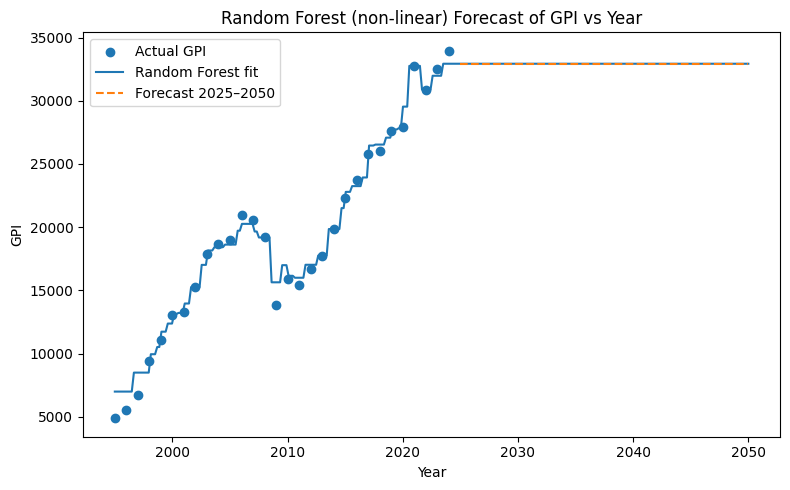

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df_GPI = pd.read_csv('GPI.csv', sep=';')
df_GPI.columns = df_GPI.columns.str.strip()

# 2. Feature (Year) and target (GPI)
X = df_GPI[['Year']].values   # shape (n_samples, 1)
y = df_GPI['GPI'].values      # shape (n_samples,)

# 3. Train/test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Build non-linear model: Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=3,   # number of trees
    max_depth=None,     # let trees grow fully (you can cap this)
    random_state=42
)

# 5. Train
rf.fit(X_train, y_train)

# 6. Evaluate
y_pred = rf.predict(X_test)
print("Random Forest performance:")
print("  R² score:", r2_score(y_test, y_pred))
print("  MAE:", mean_absolute_error(y_test, y_pred))

# 7. Refit on ALL data for final model
rf.fit(X, y)

# 8. Forecast GPI for years 2025–2050
future_years = np.arange(2025, 2051).reshape(-1, 1)   # 2025..2050 inclusive
future_gpi_pred = rf.predict(future_years)

df_future = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_GPI': future_gpi_pred
})

print(df_future.to_string(index=False))

# 9. Plot historical data + RF fit + future forecast
plt.figure(figsize=(8, 5))

# scatter of actual data
plt.scatter(df_GPI['Year'], df_GPI['GPI'], label='Actual GPI')

# smooth RF fit from min year to 2050
year_grid = np.linspace(df_GPI['Year'].min(), 2050, 300).reshape(-1, 1)
gpi_grid_pred = rf.predict(year_grid)

plt.plot(year_grid.ravel(), gpi_grid_pred, label='Random Forest fit')

# future forecast segment (2025–2050)
plt.plot(df_future['Year'], df_future['Predicted_GPI'],
         linestyle='--', label='Forecast 2025–2050')

plt.xlabel('Year')
plt.ylabel('GPI')
plt.title('Random Forest (non-linear) Forecast of GPI vs Year')
plt.legend()
plt.tight_layout()
plt.show()
